In [30]:
#!pip install spacy

In [31]:
#!pip install wordcloud

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
#!python -m spacy download en_core_web_md

In [6]:
import pandas as pd
book=pd.read_csv("Elon_musk.csv",encoding='cp1252')

In [7]:
book

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
book = [Text.strip() for Text in book.Text] # remove both the leading and the trailing characters
book = [Text for Text in book if Text] # removes empty strings, because they are considered in Python as False
book[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [9]:
# Joining the list into one string/text
text = ' '.join(book)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [10]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [11]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiwam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


In [13]:
len(text_tokens)

21785

In [14]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiwam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiwam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Noramalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution']


In [16]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [17]:
#!python -m spacy download en

In [18]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [19]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I ’ alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would


In [20]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I', "'", 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution']


#### Feature Extraction

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [22]:
print(vectorizer.vocabulary_)

{'kunalb11': 2711, 'alien': 233, 'idaacarmack': 2449, 'ray': 3622, 'trace': 4500, 'cyberpunk': 969, 'hdr': 1686, 'nextlevel': 3159, 'have': 1680, 'try': 4537, 'joerogan': 2631, 'spotify': 4117, 'great': 1620, 'interview': 2560, 'gtera27': 1639, 'doge': 1123, 'underestimate': 4670, 'teslacn': 4345, 'congratulations': 864, 'tesla': 4339, 'china': 747, 'amazing': 259, 'execution': 1336, 'last': 2730, 'year': 4939, 'now': 3199, 'next': 3158, 'even': 1308, 'happy': 1667, 'new': 3155, 'ox': 3315, 'httpstco9wfkmyu2oj': 1875, 'frodo': 1504, 'underdoge': 4669, 'all': 236, 'thought': 4424, 'would': 4915, 'fail': 1372, 'himself': 1730, 'httpstcozgxjfdzzrm': 2408, 'owensparks': 3312, 'flcnhvy': 1446, 'anonyx10': 288, 'haha': 1653, 'thank': 4382, 'indeed': 2498, 'tweets': 4560, 'definitely': 1024, 'represent': 3705, 'realworld': 3647, 'time': 4443, 'allocation': 238, 'the': 4390, 'entertaining': 1264, 'outcome': 3291, 'likely': 2790, 'givedirectly': 1591, 'just': 2659, 'send': 3891, 'agree': 202, '

In [23]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\shiwam\Anaconda_shi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
print(X.toarray().shape)

(16611, 4972)


#### Let's see how can bigrams and trigrams can be included here

In [25]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [26]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


#### TFidf vectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

####  Generate wordcloud

In [28]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

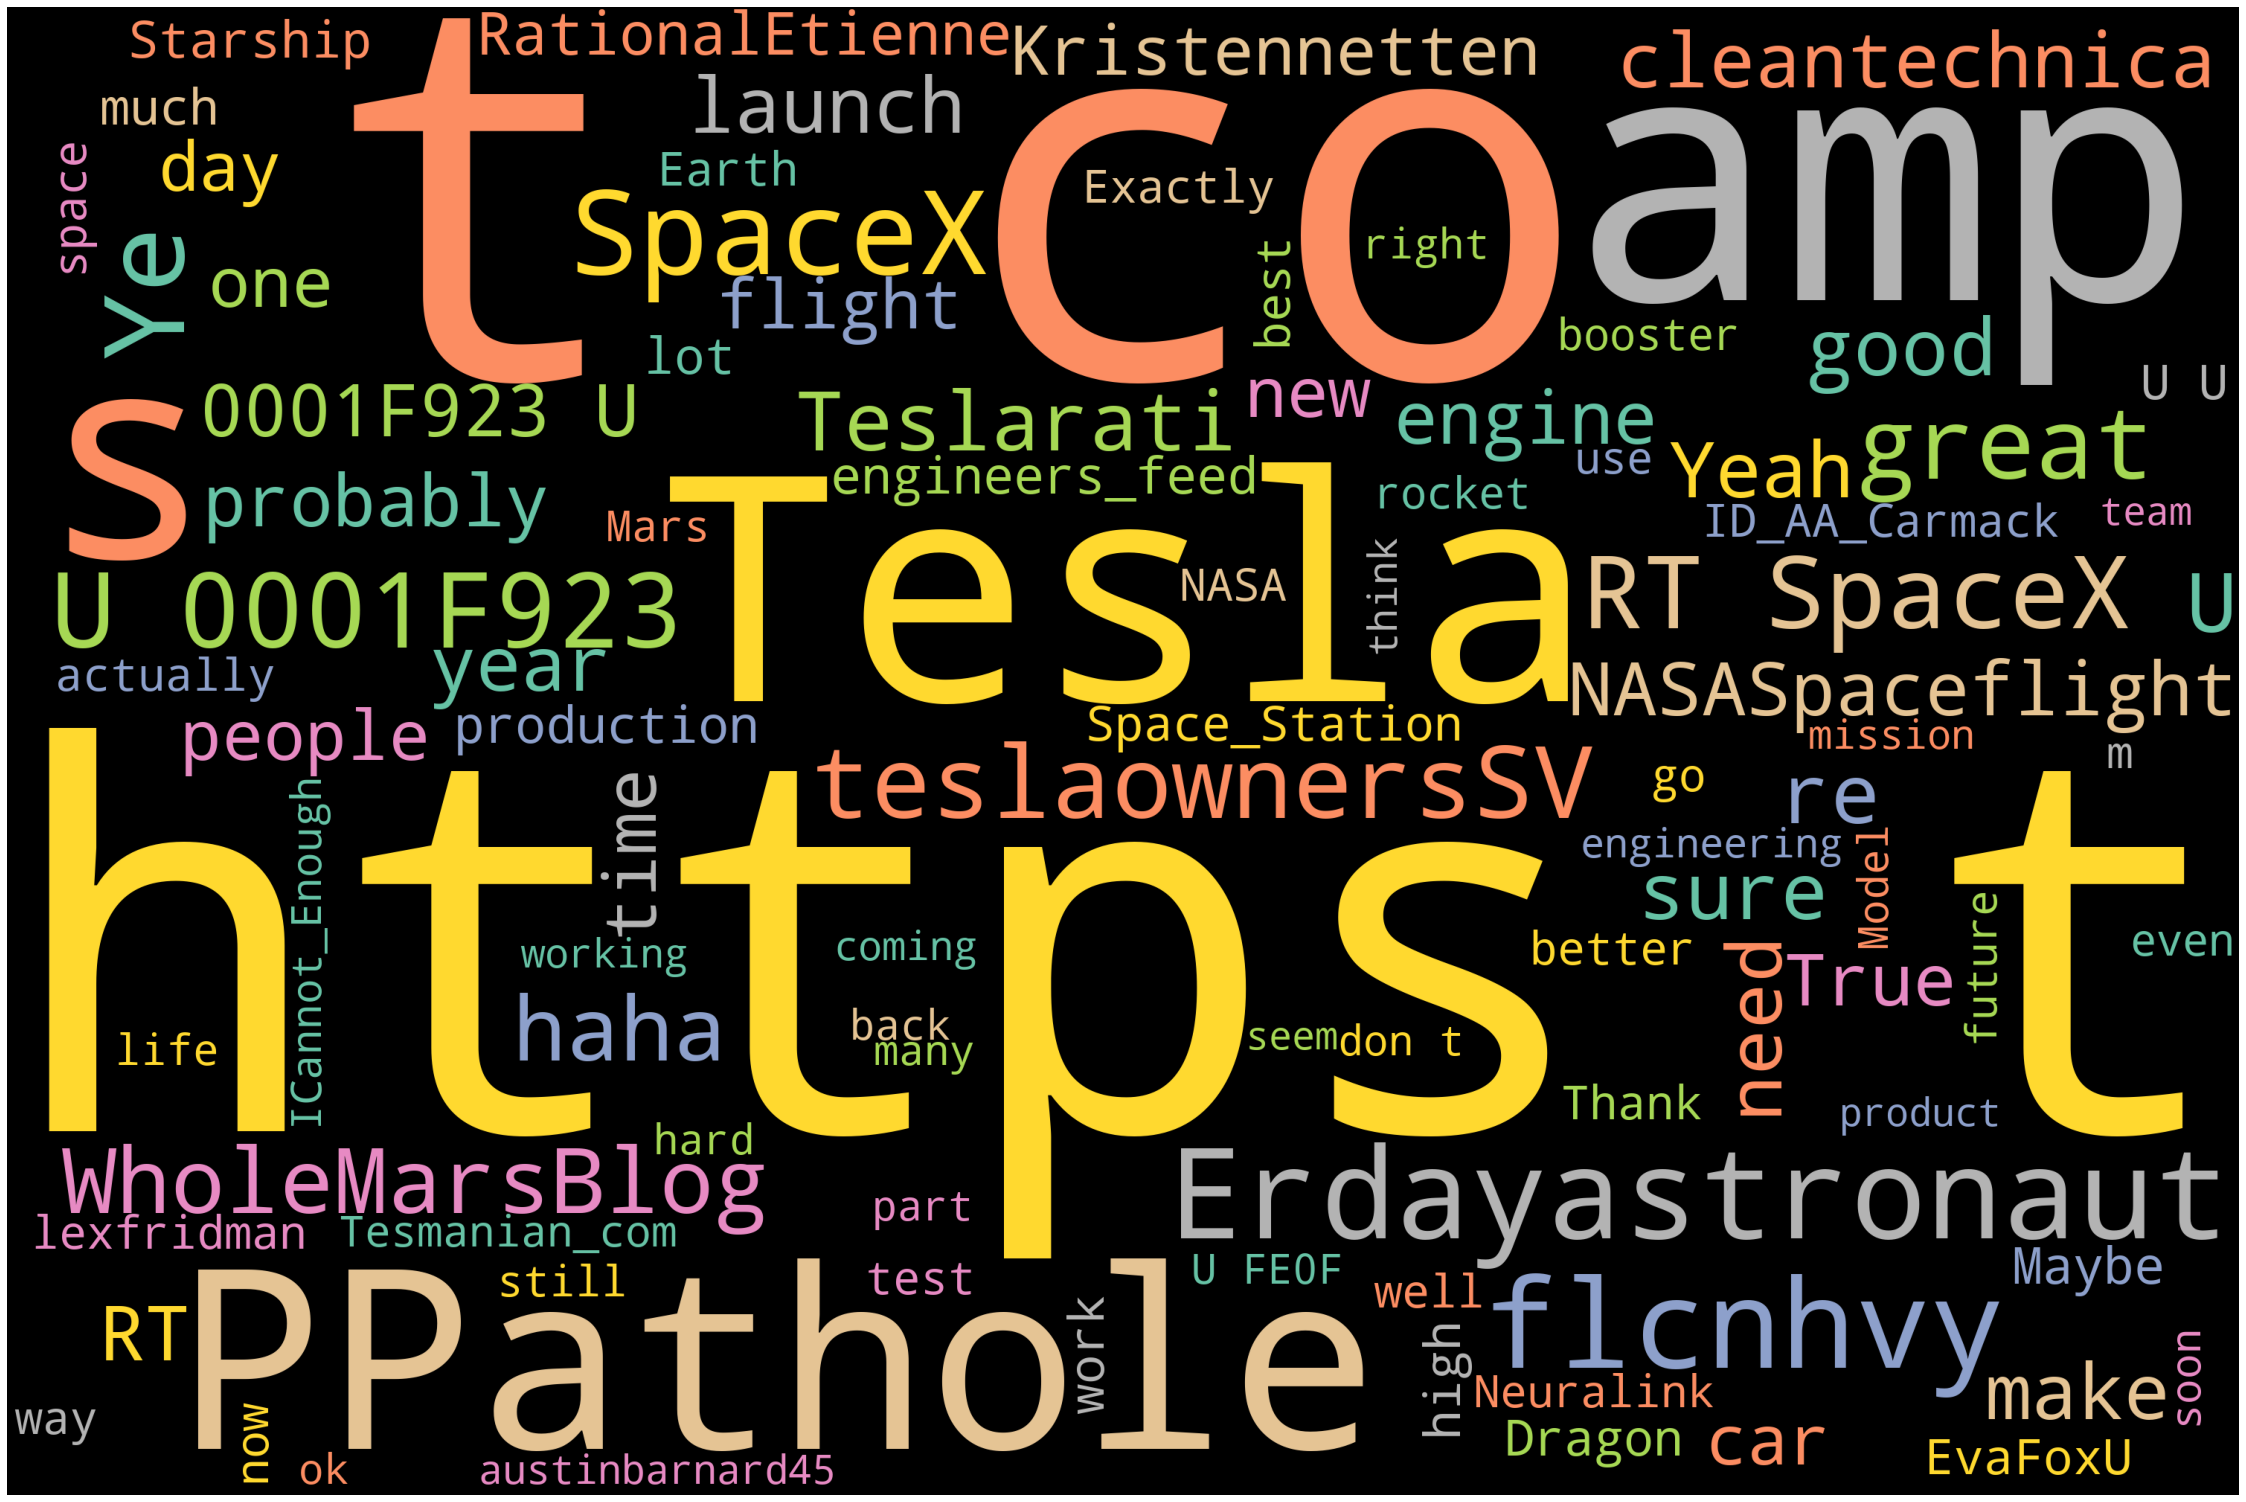

In [29]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
# Save image
#wordcloud.to_file("wordcloud.png")